  0%|                                                                                                                                                                | 0/208 [00:00<?, ?it/s]

  0%|▋                                                                                                                                                       | 1/208 [00:00<03:22,  1.02it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 208/208 [00:01<00:00, 202.87it/s]

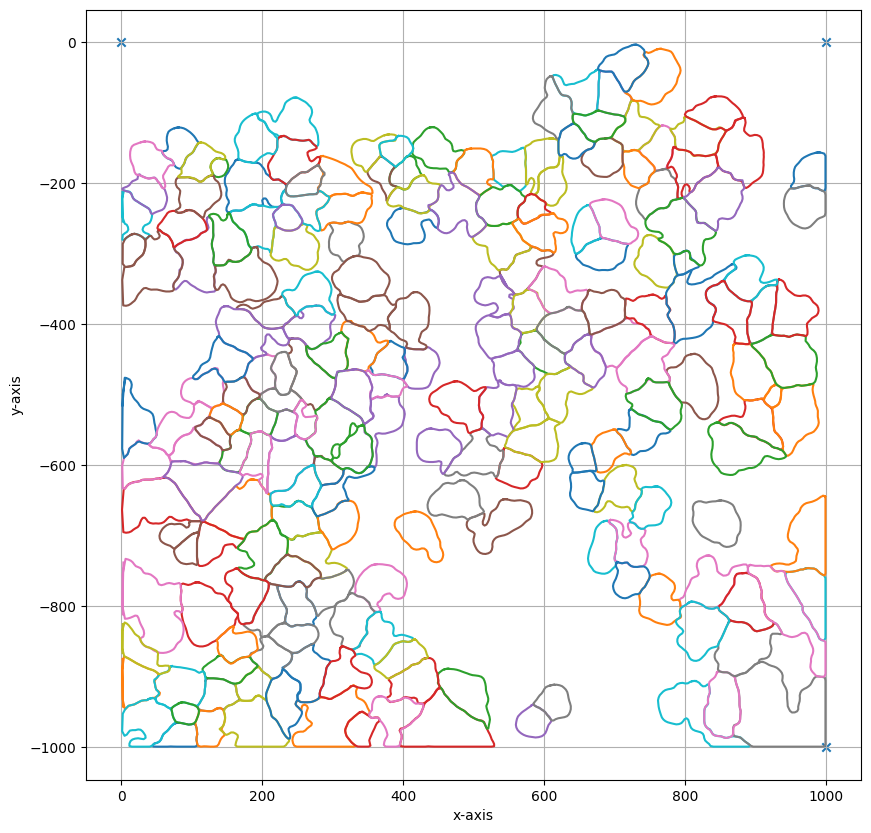

In [1]:
import numpy as np
from PIL import Image
from lmd.lib import SegmentationLoader

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im).astype(np.uint32)

all_classes = np.unique(segmentation)

cell_sets = [{"classes": all_classes, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]])
}

sl = SegmentationLoader(config = loader_config)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(fig_size = (10, 10))


In [2]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = all_classes #np.array_split(all_classes[indices],2)

cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'none',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = True)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = True, fig_size = (10, 10))




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [3]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'none',
    'convolution_smoothing':1,
    'join_intersecting': False,
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))


loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 20,
    'poly_compression_factor': 30,
    'path_optimization': 'none',
    'convolution_smoothing':40,
    'join_intersecting': False,
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), mode='dots')



FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [4]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='conv1.png')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':40,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='conv40.png')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':80,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='conv80.png')




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [5]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='bin0.png')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 15,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='bin15.png')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 30,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':1,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='bin30.png')




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [6]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 5,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':20,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='comp1.png')
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='comp_dots1.png' , mode='dots')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 5,
    'poly_compression_factor': 20,
    'path_optimization': 'hilbert',
    'convolution_smoothing':20,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='comp20.png')
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='comp_dots20.png', mode='dots')

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 0,
    'binary_smoothing': 5,
    'poly_compression_factor': 40,
    'path_optimization': 'hilbert',
    'convolution_smoothing':20,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='comp40.png')
shape_collection.plot(calibration = False, fig_size = (5, 5), save_name='comp_dots40.png', mode='dots')




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [7]:
import numpy as np
from PIL import Image
from lmd.lib import Collection, Shape, SegmentationLoader
np.random.seed(0)

im = Image.open('segmentation_cytosol.tiff')
segmentation = np.array(im)

im = np.load('channels.npy')
dapi = im[0]

all_classes = np.unique(segmentation)
indices = np.unique(np.random.randint(1,len(all_classes), size=100))
classes_to_cut = [13,15,23,24,25, 32, 36]


cell_sets = [{"classes": classes_to_cut, "well": "A1"}]

calibration_points = np.array([[0,0],[0,1000],[1000,1000]])

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_erosion': 10,
    'shape_dilation': 0,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':3,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 10,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':3,
    'join_intersecting': False,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))

loader_config = {
    'orientation_transform': np.array([[0, -1],[1, 0]]),
    'shape_dilation': 10,
    'binary_smoothing': 0,
    'poly_compression_factor': 1,
    'path_optimization': 'hilbert',
    'convolution_smoothing':3,
    'join_intersecting': True,
    'background_image': dapi
}

sl = SegmentationLoader(config = loader_config, verbose = False)
shape_collection = sl(segmentation, 
                    cell_sets, 
                    calibration_points)
                    
shape_collection.stats()
shape_collection.plot(calibration = False, fig_size = (5, 5))




FileNotFoundError: [Errno 2] No such file or directory: 'channels.npy'

In [8]:
off = np.array([10, -8])
np.max(np.array([off, [0,0]]), axis=0) 

array([10,  0])